In [7]:
#import pre-req's

import pandas as pd
import sys
import numpy as np
import os
from statistics import mean,stdev,median
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import get_cmap
import math
import mplhep as hep
from matplotlib.offsetbox import AnchoredText
import uproot
import pickle

In [114]:
#open pickle files

pkl_dir = ''
import pickle
training_list = []
with open(pkl_dir+'toa_train.pickle', 'rb') as fp:
    training_list = pickle.load(fp)
testing_list = []
with open(pkl_dir+'toa_test.pickle', 'rb') as fpp:
    testing_list = pickle.load(fpp)
    
raw_training_list = []
with open(pkl_dir+'raw_toa_train.pickle', 'rb') as fppp:
    raw_training_list = pickle.load(fppp)
raw_testing_list = []
with open(pkl_dir+'raw_toa_test.pickle', 'rb') as fpppp:
    raw_testing_list = pickle.load(fpppp)


# Goals: <br>
<li>Plot the ratio of the ADC sums for sides 0 and 1 for the data run where the beam was centered</li><br>
<li>Plot the ratio of the ADC sums for sides 0 and 1 for all data runs (shifted horizontal) superimposed on eachother</li><br>
<li>Plot the TOA difference for the data run where the beam was centered for 1 beam-centered bar and 1 bar near the edge</li>

In [137]:
# Produces a list of open pickle files with the format:
#   myList[0-3]
# Where:
#   0 = toa_train.pickle
#   1 = toa_test.pickle
#   2 = raw_toa_train.pickle
#   3 = raw_toa_test.pickle
def open_pickle(num_in):
    pkl_dir = ''
    if num_in == 1:
        num = ''
    else:
        num = f'_{num_in}'
    with open(pkl_dir+f'toa_train{num}.pickle', 'rb') as fp:
        a = pickle.load(fp)
    with open(pkl_dir+f'toa_test{num}.pickle', 'rb') as fp:
        b = pickle.load(fp)
    with open(pkl_dir+f'raw_toa_train{num}.pickle', 'rb') as fp:
        c = pickle.load(fp)
    with open(pkl_dir+f'raw_toa_test{num}.pickle', 'rb') as fp:
        d = pickle.load(fp)
    l = [a,b,c,d]
    return l

toa_1 = open_pickle(1)
toa_2 = open_pickle(2)
toa_3 = open_pickle(3)
toa_4 = open_pickle(4)

In [234]:
#adc ratio dataframe setup
training_df_1 = pd.DataFrame(toa_1[0])
raw_adc_1 = training_df_1.loc[:,6:7]
ratio_adc_1 = raw_adc_1.loc[:,6].div(raw_adc_1.loc[:,7])
ratio_adc_1
print(ratio_adc_1.mean())

training_df_2 = pd.DataFrame(toa_2[0])
raw_adc_2 = training_df_2.loc[:,6:7]
ratio_adc_2 = raw_adc_2.loc[:,6].div(raw_adc_2.loc[:,7])
ratio_adc_2
print(ratio_adc_2.mean())

training_df_3 = pd.DataFrame(toa_3[0])
raw_adc_3 = training_df_3.loc[:,6:7]
ratio_adc_3 = raw_adc_3.loc[:,6].div(raw_adc_3.loc[:,7])
ratio_adc_3
print(ratio_adc_3.mean())

training_df_4 = pd.DataFrame(toa_4[0])
raw_adc_4 = training_df_4.loc[:,6:7]
ratio_adc_4 = raw_adc_4.loc[:,6].div(raw_adc_4.loc[:,7])
print(ratio_adc_4.mean())



0.9727594878711815
0.866305521656701
0.8123385033022613
0.7502300695927974


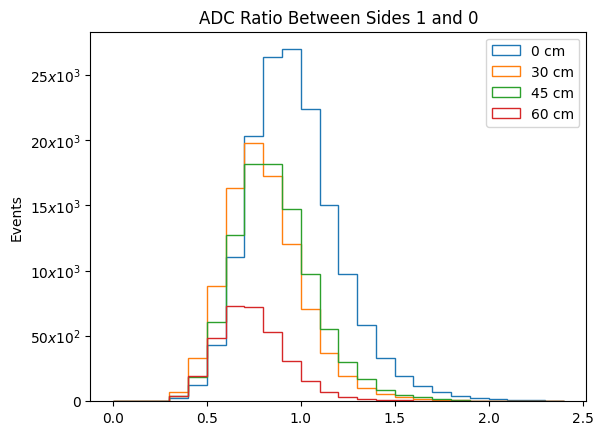

In [235]:
#Plot for ADC ratio between sides 1 and 0 for all runs.

#change how scientific notation is shown on the graph
class myFormatter(ticker.LogFormatter):
    def _num_to_string(self, x, vmin, vmax):
        if x > 100:                     # what's actually different vv
            e = x
            cnt = 0
            while(e >= 100):
                e = e/10
                cnt += 1
            s = '$%gx10^%g$' % (e, cnt) # what's actually different ^^
        elif x < 1 and x >= 0.001:
            s = '%g' % x
        elif x < 0.001:
            s = '%1.0e' % x
        else:
            s = self._pprint_val(x, vmax - vmin)
        return s

fig = plt.figure()
ax = fig.add_subplot()
fmt = myFormatter(labelOnlyBase=False, minor_thresholds=(np.inf, np.inf))
bin_size = list(np.arange(0,2.5,0.1))
h_type = 'step'
plt.ticklabel_format(axis='y',style='scientific', scilimits=(2,2), useMathText=True, useLocale=True)
ax.hist(ratio_adc_1, bins=bin_size, range=(0,6), histtype=h_type)
ax.hist(ratio_adc_3, bins=bin_size, range=(0,6), histtype=h_type)
ax.hist(ratio_adc_2, bins=bin_size, range=(0,6), histtype=h_type)
ax.hist(ratio_adc_4, bins=bin_size, range=(0,6), histtype=h_type)
ax.set_ylabel("Events")
ax.yaxis.set_major_formatter(fmt)
plt.title("ADC Ratio Between Sides 0 and 1")
ax.legend(['0 cm', '30 cm', '45 cm', '60 cm'])
plt.show()

In [670]:
toa_diff_1 = training_df_1.loc[:,0]
#toa_diff_1 = toa_diff_1[((toa_diff_1 < 25) & (toa_diff_1 > -25))]
toa_diff_2 = training_df_2.loc[:,0]
toa_diff_3 = training_df_3.loc[:,0]
toa_diff_4 = training_df_4.loc[:,0]
toa_diff_all = [toa_diff_1,toa_diff_2,toa_diff_3,toa_diff_4]

In [673]:
# trying to find the difference between the 
d1 = training_df_1.loc[:,0]
d2 = training_df_1.loc[:,6:]
d3 = pd.concat([d1,d2],axis=1)
inside_clock_0cm = d3[((d3.loc[:,0] < 25) & (d3.loc[:,0] > -25))]
outside_clock_0cm = d3[((d3.loc[:,0] > 25) | (d3.loc[:,0] < -25))]
d1 = training_df_2.loc[:,0]
d2 = training_df_2.loc[:,6:]
d3 = pd.concat([d1,d2],axis=1)
inside_clock_30cm = d3[((d3.loc[:,0] < 25) & (d3.loc[:,0] > -25))]
outside_clock_30cm = d3[((d3.loc[:,0] > 25) | (d3.loc[:,0] < -25))]
d1 = training_df_3.loc[:,0]
d2 = training_df_3.loc[:,6:]
d3 = pd.concat([d1,d2],axis=1)
inside_clock_45cm = d3[((d3.loc[:,0] < 25) & (d3.loc[:,0] > -25))]
outside_clock_45cm = d3[((d3.loc[:,0] > 25) | (d3.loc[:,0] < -25))]
d1 = training_df_4.loc[:,0]
d2 = training_df_4.loc[:,6:]
d3 = pd.concat([d1,d2],axis=1)
inside_clock_60cm = d3[((d3.loc[:,0] < 25) & (d3.loc[:,0] > -25))]
outside_clock_60cm = d3[((d3.loc[:,0] > 25) | (d3.loc[:,0] < -25))]

In [ ]:
for toa_df in toa_diff_all:
    for layer in layer_count:
        inside_clock = 

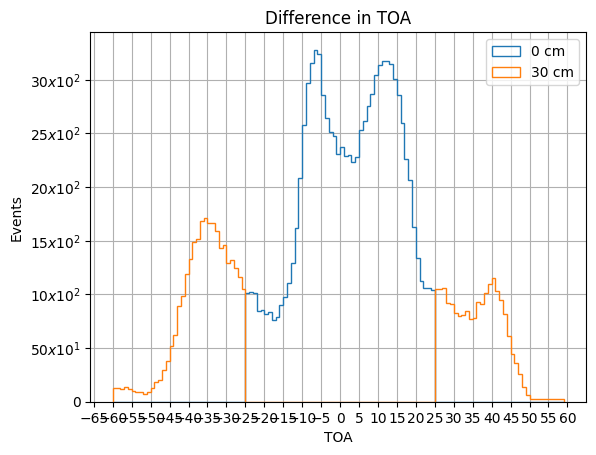

In [466]:
class myFormatter(ticker.LogFormatter):
    def _num_to_string(self, x, vmin, vmax):
        if x > 100:                     # what's actually different vv
            e = x
            cnt = 0
            while(e >= 100):
                e = e/10
                cnt += 1
            s = '$%gx10^%g$' % (e, cnt) # what's actually different ^^
        elif x < 1 and x >= 0.001:
            s = '%g' % x
        elif x < 0.001:
            s = '%1.0e' % x
        else:
            s = self._pprint_val(x, vmax - vmin)
        return s

fig = plt.figure()
ax = fig.add_subplot()
fmt = myFormatter(labelOnlyBase=False, minor_thresholds=(np.inf, np.inf))
bin_size = list(np.arange(-60,60,1))
h_type = 'step'
plt.ticklabel_format(axis='y',style='scientific', scilimits=(2,2), useMathText=True, useLocale=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.grid(visible=True)
ax.hist(inside_clock_0cm.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax.hist(outside_clock_0cm.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
# ax.hist(toa_diff_1, bins=bin_size, range=(0,6), histtype=h_type)
# ax.hist(toa_diff_2, bins=bin_size, range=(0,6), histtype=h_type)
# ax.hist(toa_diff_3, bins=bin_size, range=(0,6), histtype=h_type)
# ax.hist(toa_diff_4, bins=bin_size, range=(0,6), histtype=h_type)
ax.set_ylabel("Events")
ax.set_xlabel("TOA")
ax.yaxis.set_major_formatter(fmt)
plt.title("Difference in TOA")
ax.legend(['0 cm', '30 cm', '45 cm', '60 cm'])
plt.show()
#print(plt.Axes.get_xticks)

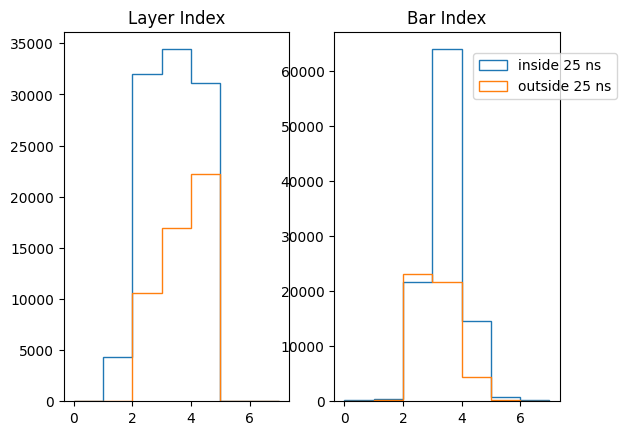

In [499]:
# layer & bar index
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
bin_size = list(np.arange(0,8,1))
ax1.hist(inside_clock_0cm.loc[:,8], bins=bin_size, range=(0,6), histtype=h_type)
ax1.hist(outside_clock_0cm.loc[:,8], bins=bin_size, range=(0,6), histtype=h_type)
ax2.hist(inside_clock_0cm.loc[:,9], bins=bin_size, range=(0,6), histtype=h_type)
ax2.hist(outside_clock_0cm.loc[:,9], bins=bin_size, range=(0,6), histtype=h_type)
fig.legend(["inside 25 ns", "outside 25 ns"], loc='upper right', bbox_to_anchor=(1, 0.85))
ax1.set_title("Layer Index")
ax2.set_title("Bar Index")
plt.show()

In [674]:
# is this an incredibly inefficient way of doing things? yes. yes it is.

i_toa_diff_0cm_l1 = inside_clock_0cm[(inside_clock_0cm.loc[:,8] == 1)] #inside clock, layer 1
o_toa_diff_0cm_l1 = outside_clock_0cm[(outside_clock_0cm.loc[:,8] == 1)]
i_toa_diff_0cm_l2 = inside_clock_0cm[(inside_clock_0cm.loc[:,8] == 2)] #inside clock, layer 1
o_toa_diff_0cm_l2 = outside_clock_0cm[(outside_clock_0cm.loc[:,8] == 2)]
i_toa_diff_0cm_l3 = inside_clock_0cm[(inside_clock_0cm.loc[:,8] == 3)] #inside clock, layer 1
o_toa_diff_0cm_l3 = outside_clock_0cm[(outside_clock_0cm.loc[:,8] == 3)]
i_toa_diff_0cm_l4 = inside_clock_0cm[(inside_clock_0cm.loc[:,8] == 4)] #inside clock, layer 1
o_toa_diff_0cm_l4 = outside_clock_0cm[(outside_clock_0cm.loc[:,8] == 4)]

i_toa_diff_30cm_l1 = inside_clock_30cm[(inside_clock_30cm.loc[:,8] == 1)] #inside clock, layer 1
o_toa_diff_30cm_l1 = outside_clock_30cm[(outside_clock_30cm.loc[:,8] == 1)]
i_toa_diff_30cm_l2 = inside_clock_30cm[(inside_clock_30cm.loc[:,8] == 2)] #inside clock, layer 1
o_toa_diff_30cm_l2 = outside_clock_30cm[(outside_clock_30cm.loc[:,8] == 2)]
i_toa_diff_30cm_l3 = inside_clock_30cm[(inside_clock_30cm.loc[:,8] == 3)] #inside clock, layer 1
o_toa_diff_30cm_l3 = outside_clock_30cm[(outside_clock_30cm.loc[:,8] == 3)]
i_toa_diff_30cm_l4 = inside_clock_30cm[(inside_clock_30cm.loc[:,8] == 4)] #inside clock, layer 1
o_toa_diff_30cm_l4 = outside_clock_30cm[(outside_clock_30cm.loc[:,8] == 4)]

i_toa_diff_45cm_l1 = inside_clock_45cm[(inside_clock_45cm.loc[:,8] == 1)] #inside clock, layer 1
o_toa_diff_45cm_l1 = outside_clock_45cm[(outside_clock_45cm.loc[:,8] == 1)]
i_toa_diff_45cm_l2 = inside_clock_45cm[(inside_clock_45cm.loc[:,8] == 2)] #inside clock, layer 1
o_toa_diff_45cm_l2 = outside_clock_45cm[(outside_clock_45cm.loc[:,8] == 2)]
i_toa_diff_45cm_l3 = inside_clock_45cm[(inside_clock_45cm.loc[:,8] == 3)] #inside clock, layer 1
o_toa_diff_45cm_l3 = outside_clock_45cm[(outside_clock_45cm.loc[:,8] == 3)]
i_toa_diff_45cm_l4 = inside_clock_45cm[(inside_clock_45cm.loc[:,8] == 4)] #inside clock, layer 1
o_toa_diff_45cm_l4 = outside_clock_45cm[(outside_clock_45cm.loc[:,8] == 4)]

i_toa_diff_60cm_l1 = inside_clock_60cm[(inside_clock_60cm.loc[:,8] == 1)] #inside clock, layer 1
o_toa_diff_60cm_l1 = outside_clock_60cm[(outside_clock_60cm.loc[:,8] == 1)]
i_toa_diff_60cm_l2 = inside_clock_60cm[(inside_clock_60cm.loc[:,8] == 2)] #inside clock, layer 1
o_toa_diff_60cm_l2 = outside_clock_60cm[(outside_clock_60cm.loc[:,8] == 2)]
i_toa_diff_60cm_l3 = inside_clock_60cm[(inside_clock_60cm.loc[:,8] == 3)] #inside clock, layer 1
o_toa_diff_60cm_l3 = outside_clock_60cm[(outside_clock_60cm.loc[:,8] == 3)]
i_toa_diff_60cm_l4 = inside_clock_60cm[(inside_clock_60cm.loc[:,8] == 4)] #inside clock, layer 1
o_toa_diff_60cm_l4 = outside_clock_60cm[(outside_clock_60cm.loc[:,8] == 4)]


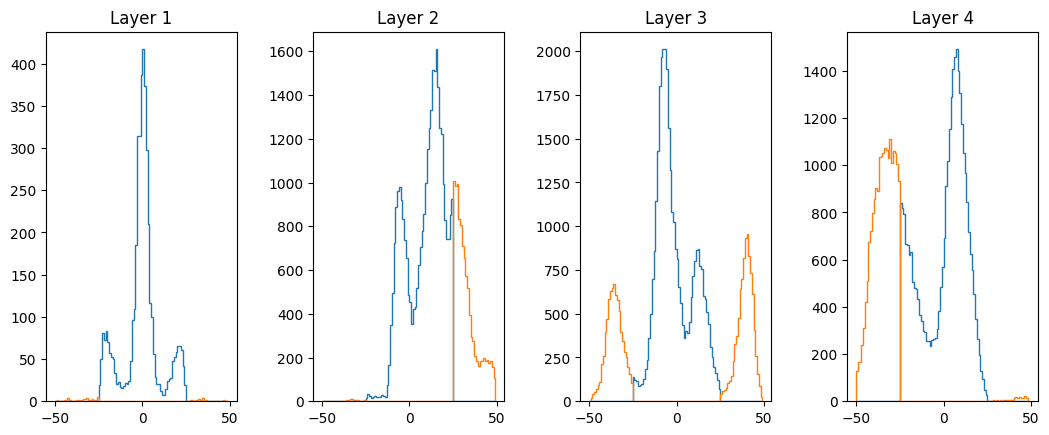

In [677]:
fig = plt.figure(figsize=[12.8,4.8])
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
axes = [[ax1,1], [ax2,2], [ax3,3], [ax4,4]]
bin_size=list(np.arange(-50,50,1))
for axis,layer in axes:
    axis.set_title(f'Layer {layer}')
ax1.hist(i_toa_diff_0cm_l1.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax1.hist(o_toa_diff_0cm_l1.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax2.hist(i_toa_diff_0cm_l2.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax2.hist(o_toa_diff_0cm_l2.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax3.hist(i_toa_diff_0cm_l3.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax3.hist(o_toa_diff_0cm_l3.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax4.hist(i_toa_diff_0cm_l4.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax4.hist(o_toa_diff_0cm_l4.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)

fig.subplots_adjust(wspace=.4) # add more space between plots
plt.show()

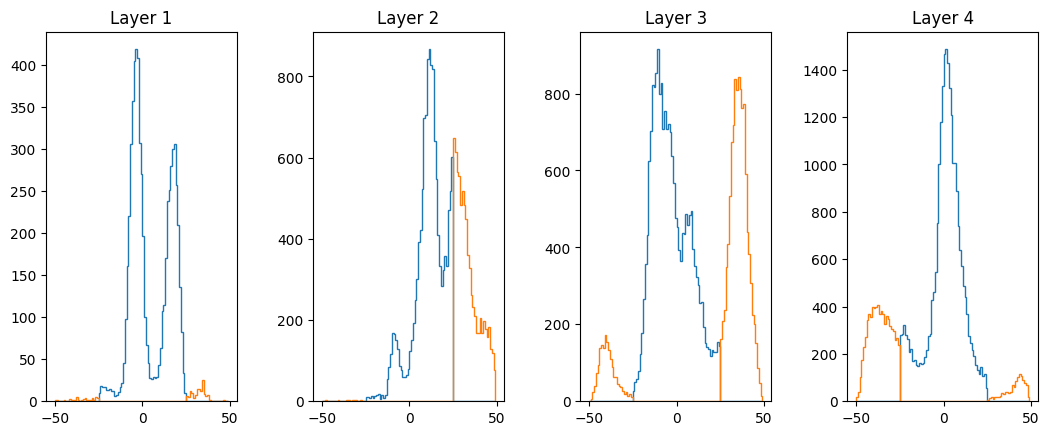

In [678]:
fig = plt.figure(figsize=[12.8,4.8])
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
axes = [[ax1,1], [ax2,2], [ax3,3], [ax4,4]]
bin_size=list(np.arange(-50,50,1))
for axis,layer in axes:
    axis.set_title(f'Layer {layer}')
ax1.hist(i_toa_diff_30cm_l1.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax1.hist(o_toa_diff_30cm_l1.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax2.hist(i_toa_diff_30cm_l2.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax2.hist(o_toa_diff_30cm_l2.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax3.hist(i_toa_diff_30cm_l3.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax3.hist(o_toa_diff_30cm_l3.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax4.hist(i_toa_diff_30cm_l4.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax4.hist(o_toa_diff_30cm_l4.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)

fig.subplots_adjust(wspace=.4) # add more space between plots
plt.show()

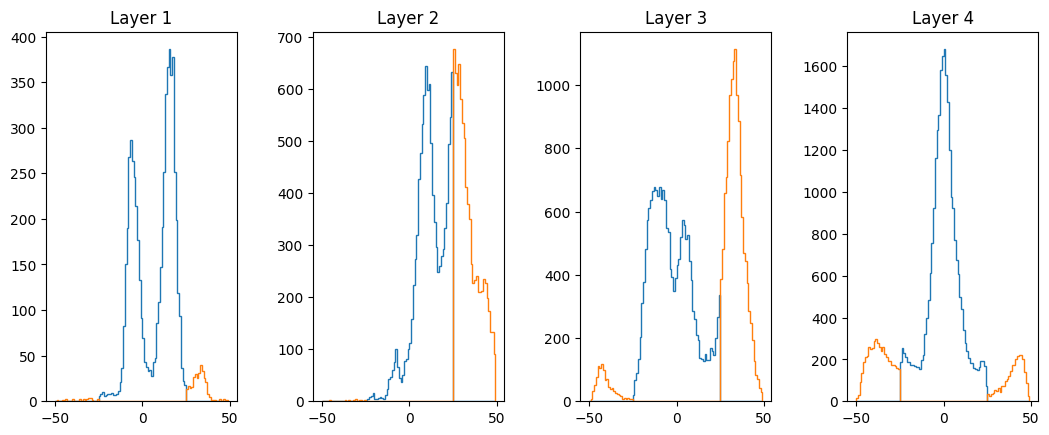

In [679]:
fig = plt.figure(figsize=[12.8,4.8])
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
axes = [[ax1,1], [ax2,2], [ax3,3], [ax4,4]]
bin_size=list(np.arange(-50,50,1))
for axis,layer in axes:
    axis.set_title(f'Layer {layer}')
ax1.hist(i_toa_diff_45cm_l1.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax1.hist(o_toa_diff_45cm_l1.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax2.hist(i_toa_diff_45cm_l2.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax2.hist(o_toa_diff_45cm_l2.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax3.hist(i_toa_diff_45cm_l3.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax3.hist(o_toa_diff_45cm_l3.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax4.hist(i_toa_diff_45cm_l4.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax4.hist(o_toa_diff_45cm_l4.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)

fig.subplots_adjust(wspace=.4) # add more space between plots
plt.show()

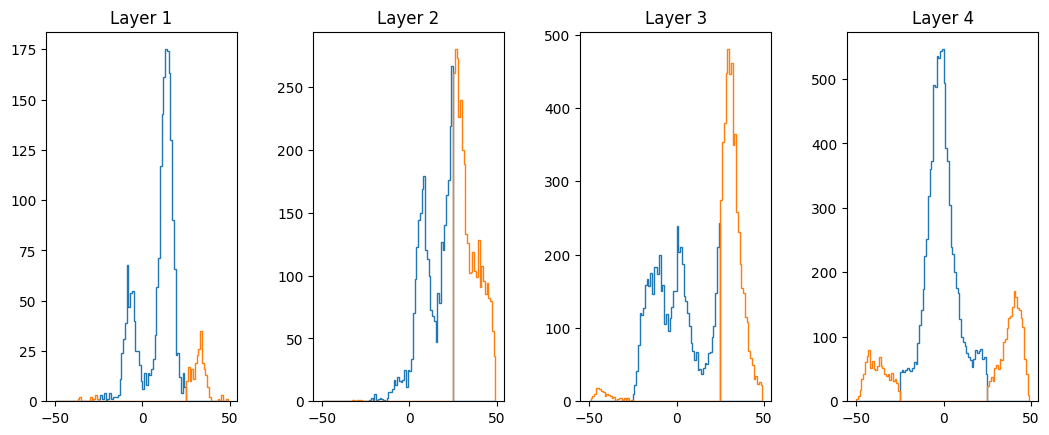

In [680]:
fig = plt.figure(figsize=[12.8,4.8])
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
axes = [[ax1,1], [ax2,2], [ax3,3], [ax4,4]]
bin_size=list(np.arange(-50,50,1))
for axis,layer in axes:
    axis.set_title(f'Layer {layer}')
ax1.hist(i_toa_diff_60cm_l1.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax1.hist(o_toa_diff_60cm_l1.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax2.hist(i_toa_diff_60cm_l2.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax2.hist(o_toa_diff_60cm_l2.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax3.hist(i_toa_diff_60cm_l3.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax3.hist(o_toa_diff_60cm_l3.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax4.hist(i_toa_diff_60cm_l4.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax4.hist(o_toa_diff_60cm_l4.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)

fig.subplots_adjust(wspace=.4) # add more space between plots
plt.show()

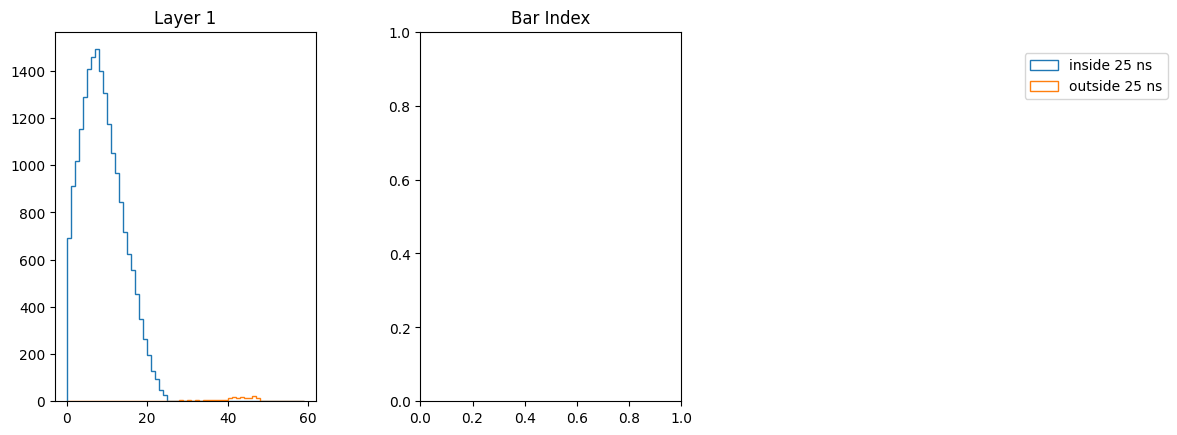

In [562]:
fig = plt.figure(figsize=[12.8,4.8])
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
fig.subplots_adjust(wspace=.4) # add more space between plots
bin_size = list(np.arange(0,60,1))
ax1.hist(i_toa_diff_0cm_l1.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
ax1.hist(o_toa_diff_0cm_l1.loc[:,0], bins=bin_size, range=(0,6), histtype=h_type)
#ax2.hist(inside_clock_0cm.loc[:,9], bins=bin_size, range=(0,6), histtype=h_type)
#ax2.hist(outside_clock_0cm.loc[:,9], bins=bin_size, range=(0,6), histtype=h_type)
fig.legend(["inside 25 ns", "outside 25 ns"], loc='upper right', bbox_to_anchor=(1, 0.85))
ax1.set_title("Layer 1")
ax2.set_title("Bar Index")
plt.show()

In [9]:
class TOAFile():
# Name: TOAFILE()
# Description: The purpose of the TOAFile class is to be an all encompassing class that manages the testbeam data. One would designate a pickle file in the same directory as this jupyter notebook or a sub-directory. 
#   This is to make it easier to analyse multiple data runs without running into issues keeping track of multiple databases with increasingly complex names such as "i_toa_diff_0cm_l1".
    
    def __init__(self,pickle_file):
        self.pkl = pickle_file
        with open(pickle_file, 'rb') as fp:
            self.training_list = pd.DataFrame(pickle.load(fp))
    
    
    def __vprint(self, *args):
    # custom print function for functions like self.update() and self.deallocate()
    # 1st arg is text, 2nd arg is a boolean controlling whether to print or not.
    
        if len(args) > 1:
            do_print = args[1]
        else:
            do_print = False
        if (do_print):
            print(args[0])
            return 0
        else:
                return 1
    
    def get_toa_diff(self, **kwarg):
    # Finds the difference of TOA between side 1 and 0. Optional **kwarg <clock_cycle> can isolate or remove data with a difference of +/- 25 ns.
    
        if len(kwarg) > 0:
            try:
                clock_cycle = kwarg['clock_cycle']
            except:
                clock_cycle = 'None'
            if clock_cycle != 'None':
                temp_df_1 = self.training_list.loc[:,0]
                temp_df_2 = self.training_list.loc[:,6:]
                temp_df_3 = pd.concat([temp_df_1,temp_df_2],axis=1)
                if clock_cycle == 'first':
                    output = temp_df_3[((temp_df_3.loc[:,0] < 25) & (temp_df_3.loc[:,0] > -25))]
                    output = output.loc[:,0]
                elif clock_cycle == 'other':
                    output = temp_df_3[((temp_df_3.loc[:,0] > 25) | (temp_df_3.loc[:,0] < -25))]
                    output = output.loc[:,0]
                else:
                    print("Error: Invalid argument for clock_cycle. Try \'first\' or \'other\'")
                    output = []
        else: 
            output = self.training_list.loc[:,0]
        return output
    
    def get_adc_ratio(self):
    # Finds the ratio between ADC on side 0 over the ADC on side 1.
    
        temp_df = self.training_list.loc[:,6:7]
        output = temp_df.loc[:,6].div(temp_df.loc[:,7])
        return output
    
    
    
    def update(self, v=False):
    # Saves dataframe 
        self.__vprint('Updating Dataframes...',v)
        
        self.adc_ratio = self.get_adc_ratio()
        self.__vprint('\tadc_ratio updated.',v)
        
        self.toa_diff = self.get_toa_diff()
        self.__vprint('\ttoa_diff updated.',v)
        self.toa_diff_first_clock = self.get_toa_diff(clock_cycle='first')
        self.__vprint('\ttoa_diff_first_clock updated.',v)
        self.toa_diff_other_clock = self.get_toa_diff(clock_cycle='other')
        self.__vprint('\ttoa_diff_other_clock updated.',v)
        
        self.__vprint('Update complete.',v)
    
    def deallocate(self, v=False):
    # Deallocates memory of various dataframes
        self.__vprint('Deallocating Dataframes...',v)
        def attempt(choice):
            a = nameof(choice)
            print(a)
            try: 
                del choice
                self.__vprint(f'\t{nameof(choice)} deallocated.',v)
            except:
                self.__vprint(f'\t{nameof(choice)} not found.')
        attempt(self.adc_ratio)
        
        # try:
        #     del self.adc_ratio
        #     self.__vprint('\tdeallocated: adc_ratio',v)
        # except:
        #     self.__vprint('\tadc_ratio not found',v)
        try:
            del self.toa_diff
            self.__vprint('\tdeallocated: toa_diff',v)
            del self.toa_diff_first_clock
            self.__vprint('\tdeallocated: toa_diff_first_clock',v)
            del self.toa_diff_other_clock
            self.__vprint('\tdeallocated: toa_diff_other_clock',v)
        except:
            self.__vprint('\ttoa_diff not found',v)
        try:
            del self.training_list
            self.__vprint('\tdeallocated: training_list',v)
        except:
            self.__vprint('training_list not found',v)
            self.__vprint('Deallocation complete.',v)
        self.__vprint('Deallocation Complete.',v)
        
# RECODE A LOT OF SHIT
# Re-add in the layer non-sense
# change things so that it is current_data viable

In [10]:
t1 = TOAFile('toa_train.pickle')
t1.update(True)
t1.deallocate(True)

Updating Dataframes...
	adc_ratio updated.
	toa_diff updated.
	toa_diff_first_clock updated.
	toa_diff_other_clock updated.
Update complete.
Deallocating Dataframes...


NameError: name 'nameof' is not defined

In [ ]:
# re-add in the new fancy graph visualization stuff.
# this is gonna be painful to recode :(
    